## Example 2 - `stripy` predefined meshes

One common use of `stripy` is in meshing the sphere and, to this end, we provide pre-defined meshes for icosahedral and octahedral triangulations, each of which can have mid-face centroid points included. A triangulation of the six cube-vertices is also provided as well as a 'buckyball' (or 'soccer ball') mesh. A random mesh is included as a counterpoint to the regular meshes. Each of these meshes is also an `sTriangulation`. 

The mesh classes in `stripy` are:

```python

stripy.spherical_meshes.octahedral_mesh(include_face_points=False)
stripy.spherical_meshes.icosahedral_mesh(include_face_points=False)
stripy.spherical_meshes.triangulated_cube_mesh()
stripy.spherical_meshes.triangulated_soccerball_mesh()
stripy.spherical_meshes.uniform_ring_mesh(resolution=5)
stripy.spherical_meshes.random_mesh(number_of_points=5000)
``` 

Any of the above meshes can be uniformly refined by specifying the `refinement_levels` parameter. 

#### Notebook contents

   - [Sample meshes](#Sample-meshes)
   - [Mesh characteristics](#Analysis-of-the-characteristics-of-the-triangulations)
   - [Icosahedron with face points in detail](#The-icosahedron-with-faces-looks-like-this)
   - [Compare the predefined meshes](#Plot-and-compare-the-predefined-meshes)


The next example is [Ex3-Interpolation](./Ex3-Interpolation.ipynb)

---

### Sample meshes

We create a number of meshes from the basic types available in `stripy` with approximately similar numbers of vertices.

In [1]:
import stripy as stripy

str_fmt = "{:35} {:3}\t{:6}"


## A bunch of meshes with roughly similar overall numbers of points / triangles

octo0  = stripy.spherical_meshes.octahedral_mesh(include_face_points=False, refinement_levels=0)
octo2  = stripy.spherical_meshes.octahedral_mesh(include_face_points=False, refinement_levels=2)
octoR  = stripy.spherical_meshes.octahedral_mesh(include_face_points=False, refinement_levels=5)

print(str_fmt.format("Octahedral mesh", octo0.npoints, octoR.npoints))


octoF0  = stripy.spherical_meshes.octahedral_mesh(include_face_points=True, refinement_levels=0)
octoF2  = stripy.spherical_meshes.octahedral_mesh(include_face_points=True, refinement_levels=2)
octoFR  = stripy.spherical_meshes.octahedral_mesh(include_face_points=True, refinement_levels=4)

print(str_fmt.format("Octahedral mesh with faces", octoF0.npoints, octoFR.npoints))


cube0 = stripy.spherical_meshes.triangulated_cube_mesh(refinement_levels=0)
cube2 = stripy.spherical_meshes.triangulated_cube_mesh(refinement_levels=2)
cubeR = stripy.spherical_meshes.triangulated_cube_mesh(refinement_levels=5)

print(str_fmt.format("Cube mesh", cube0.npoints, cubeR.npoints))


ico0 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=0)
ico2 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=2)
icoR = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=4)

print(str_fmt.format("Icosahedral mesh", ico0.npoints, icoR.npoints))


icoF0 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=0, include_face_points=True)
icoF2 = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=2, include_face_points=True)
icoFR = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=4, include_face_points=True)

print(str_fmt.format("Icosahedral mesh with faces", icoF0.npoints, icoFR.npoints))


socc0 = stripy.spherical_meshes.triangulated_soccerball_mesh(refinement_levels=0)
socc2 = stripy.spherical_meshes.triangulated_soccerball_mesh(refinement_levels=1)
soccR = stripy.spherical_meshes.triangulated_soccerball_mesh(refinement_levels=3)

print(str_fmt.format("BuckyBall mesh", socc0.npoints, soccR.npoints))


## Need a reproducible hierarchy ... 
ring0 = stripy.spherical_meshes.uniform_ring_mesh(resolution=5, refinement_levels=0)

lon, lat = ring0.uniformly_refine_triangulation()
ring1 = stripy.sTriangulation(lon, lat)

lon, lat = ring1.uniformly_refine_triangulation()
ring2 = stripy.sTriangulation(lon, lat)

lon, lat = ring2.uniformly_refine_triangulation()
ring3 = stripy.sTriangulation(lon, lat)

lon, lat = ring3.uniformly_refine_triangulation()
ringR = stripy.sTriangulation(lon, lat)


# ring2 = stripy.uniform_ring_mesh(resolution=6, refinement_levels=2)
# ringR = stripy.uniform_ring_mesh(resolution=6, refinement_levels=4)

print(str_fmt.format("Ring mesh (9)", ring0.npoints, ringR.npoints))

randR = stripy.spherical_meshes.random_mesh(number_of_points=5000)
rand0 = stripy.sTriangulation(lons=randR.lons[::50],lats=randR.lats[::50])
rand2 = stripy.sTriangulation(lons=randR.lons[::25],lats=randR.lats[::25])

print(str_fmt.format("Random mesh (6)", rand0.npoints, randR.npoints))

Octahedral mesh                       6	  4098
Octahedral mesh with faces           14	  3074
Cube mesh                             8	  6146
Icosahedral mesh                     12	  2562
Icosahedral mesh with faces          32	  7682
BuckyBall mesh                       92	  5762
Ring mesh (9)                        30	  7170
Random mesh (6)                     100	  5000


In [2]:
print("Octo: {}".format(octo0.__doc__))
print("Cube: {}".format(cube0.__doc__))
print("Ico: {}".format(ico0.__doc__))
print("Socc: {}".format(socc0.__doc__))
print("Ring: {}".format(ring0.__doc__))
print("Random: {}".format(randR.__doc__))

Octo: 
    An octahedral triangulated mesh based on the sTriangulation class
    
Cube: 
    An cube-based triangulated mesh based on the sTriangulation class
    
Ico: 
    An icosahedral triangulated mesh based on the sTriangulation class.
    
Socc: 
    This mesh is inspired by the C60 molecule and the soccerball - a truncated
    icosahedron with mid points added to all pentagon and hexagon faces to create
    a uniform triangulation.
    
Ring: 
    A mesh of made of rings to create a roughly gridded, even spacing on
    the sphere. There is a small random component to prevent points lying along the
    prime meridian so this mesh should be used with caution in parallel
    
Random: 
    A mesh of random points. Take care if you use this is parallel
    as the location of points will not be the same on all processors
    


### Analysis of the characteristics of the triangulations

We plot a histogram of the (spherical) areas of the triangles in each of the triangulations normalised by the average area. This is one 
measure of the uniformity of each mesh.

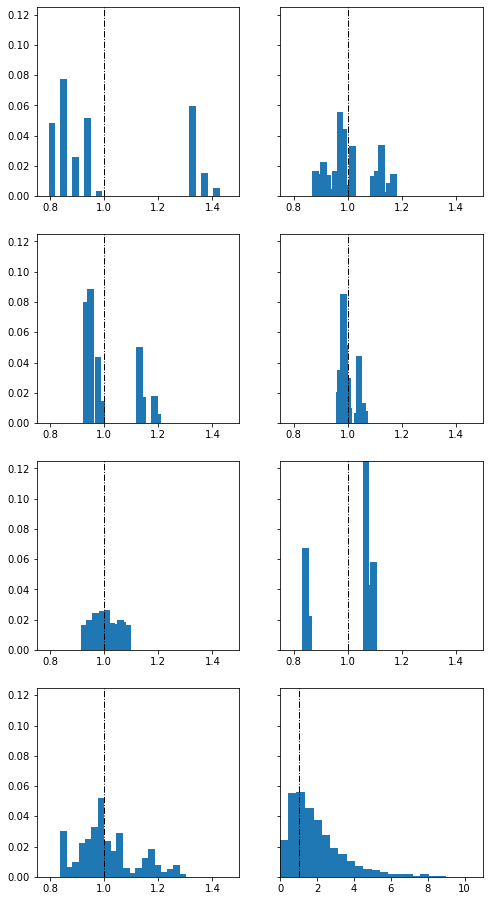

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def area_histo(mesh):
    
    freq, area_bin = np.histogram(mesh.areas(), bins=20)
    area = 0.5 * (area_bin[1:] + area_bin[:-1])
    (area * freq)
    norm_area = area / mesh.areas().mean()
    
    return norm_area, 0.25 * freq*area / np.pi**2

def add_plot(axis, mesh, xlim, ylim):
    u, v = area_histo(mesh)
    axis.bar(u, v, width=0.025)
    axis.set_xlim(xlim)
    axis.set_ylim(ylim)
    axis.plot([1.0,1.0], [0.0,1.5], linewidth=1.0, linestyle="-.", color="Black")

    return



fig, ax = plt.subplots(4,2, sharey=True, figsize=(8,16))

xlim=(0.75,1.5)
ylim=(0.0,0.125)

# octahedron

add_plot(ax[0,0], octoR, xlim, ylim)

# octahedron + faces

add_plot(ax[0,1], octoFR, xlim, ylim)


# icosahedron

add_plot(ax[1,0], icoR, xlim, ylim)

# icosahedron + faces

add_plot(ax[1,1], icoFR, xlim, ylim)


# cube

add_plot(ax[2,0], cubeR, xlim, ylim)

# C60

add_plot(ax[2,1], soccR, xlim, ylim)


# ring

add_plot(ax[3,0], ringR, xlim, ylim)

# random (this one is very different from the others ... )

axis=ax[3,1]
u, v = area_histo(randR)
axis.bar(u, v, width=0.5)
axis.set_xlim(0.0,11.0)
axis.set_ylim(0,0.125)
axis.plot([1.0,1.0], [0.0,1.5], linewidth=1.0, linestyle="-.", color="Black")


fig.savefig("AreaDistributionsByMesh.png", dpi=250, transparent=True)


#ax.bar(norm_area, area*freq, width=0.01)

### The icosahedron with faces looks like this

It is helpful to be able to view a mesh in 3D to verify that it is an appropriate choice. Here, for example, is the icosahedron with additional points in the centroid of the faces.

This produces triangles with a narrow area distribution. In three dimensions it is easy to see the origin of the size variations.

In [4]:
## The icosahedron with faces in 3D view 

import lavavu

from xvfbwrapper import Xvfb
with Xvfb() as xvfb:

    ## or smesh = icoF0
    smesh = icoFR

    lv = lavavu.Viewer(border=False, background="#FFFFFF", resolution=[1000,600], near=-10.0)

    tris = lv.triangles("triangulation",  wireframe=True, colour="#444444", opacity=0.8)
    tris.vertices(smesh.points)
    tris.indices(smesh.simplices)

    tris2 = lv.triangles("triangles",  wireframe=False, colour="#77ff88", opacity=0.8)
    tris2.vertices(smesh.points)
    tris2.indices(smesh.simplices)

    nodes = lv.points("nodes", pointsize=2.0, pointtype="shiny", colour="#448080", opacity=0.75)
    nodes.vertices(smesh.points)


    lv.control.Panel()
    lv.control.Range('specular', range=(0,1), step=0.1, value=0.4)
    lv.control.Checkbox(property='axis')
    lv.control.ObjectList()
    lv.control.show()

OSError: Can not find Xvfb. Please install it and try again.

In [5]:
%matplotlib inline

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

global_extent     = [-180.0, 180.0, -90.0, 90.0]

projection1 = ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0, globe=None)
projection2 = ccrs.Mollweide(central_longitude=-120)
projection3 = ccrs.PlateCarree()
base_projection = ccrs.PlateCarree()

### Plot and compare the predefined meshes

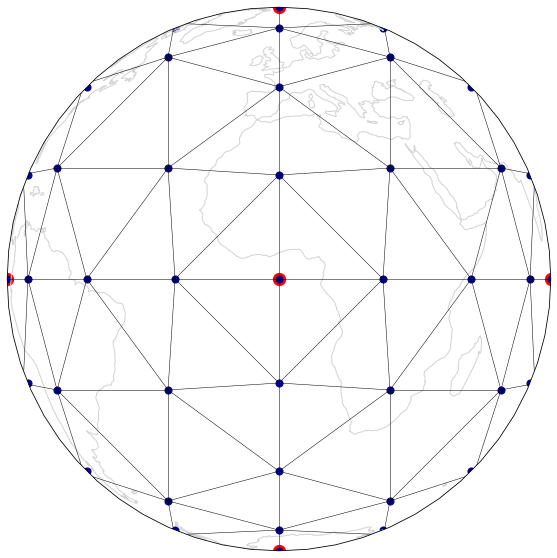

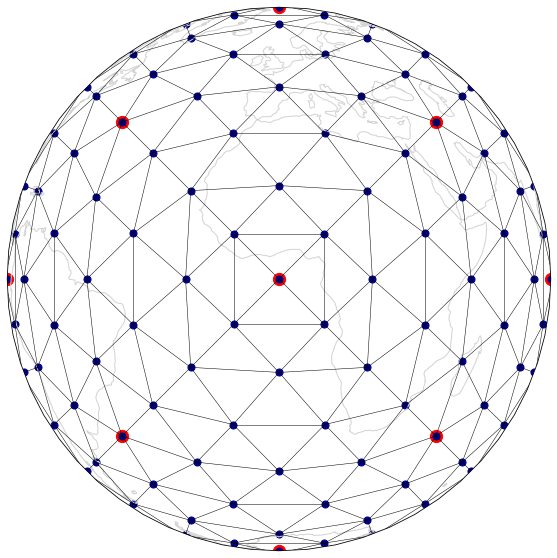

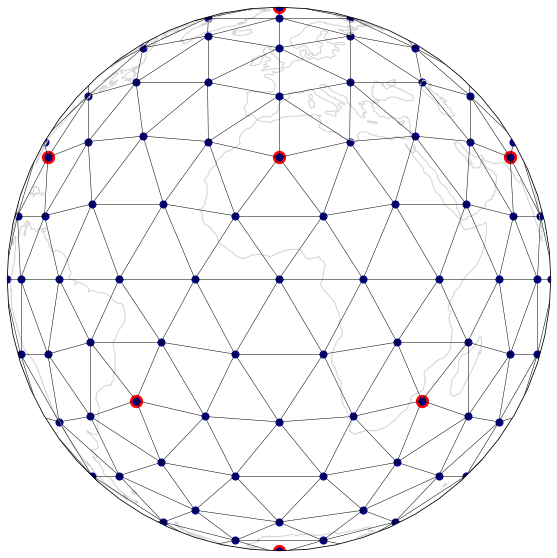

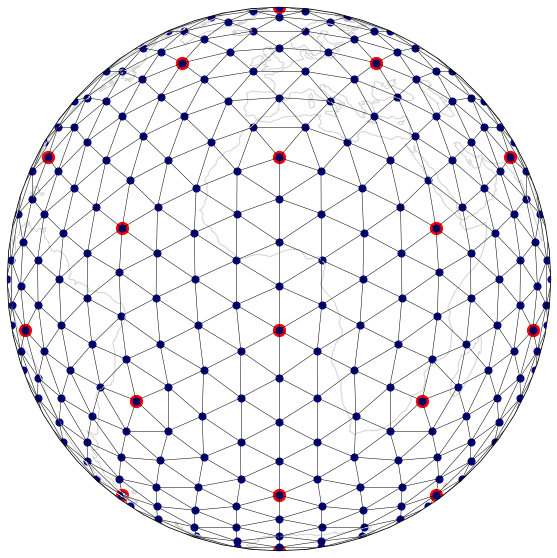

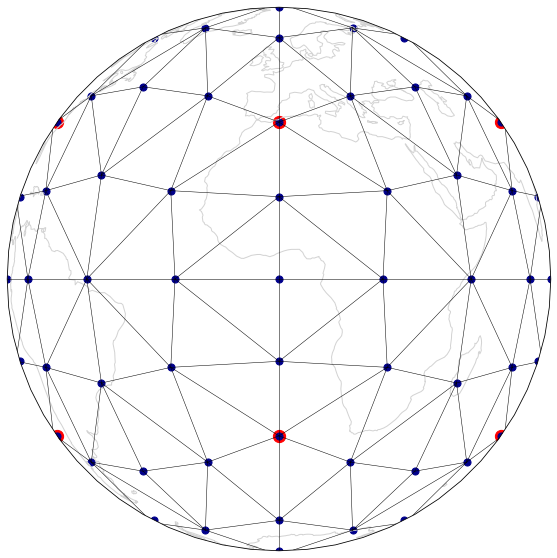

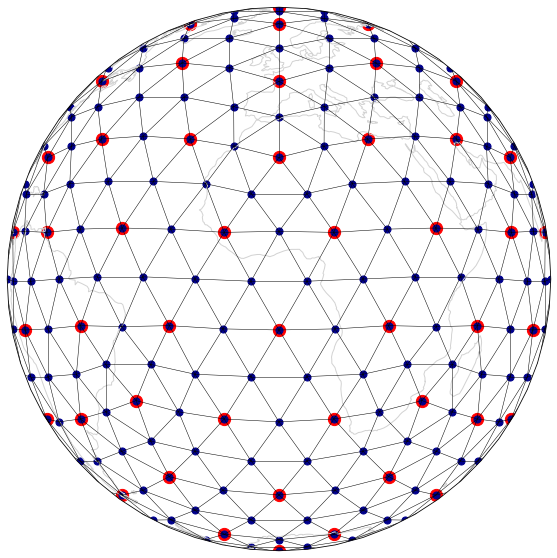

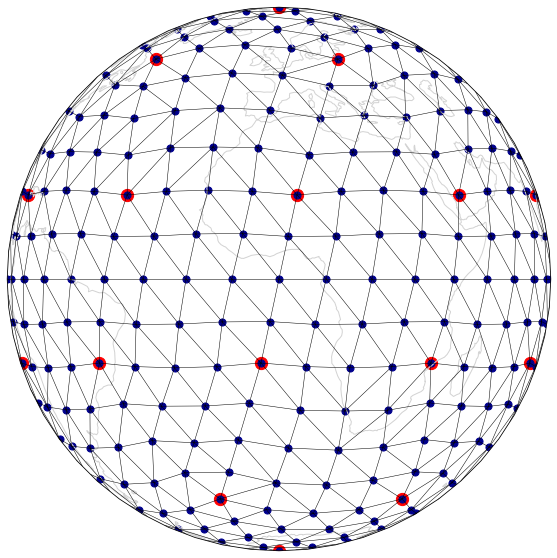

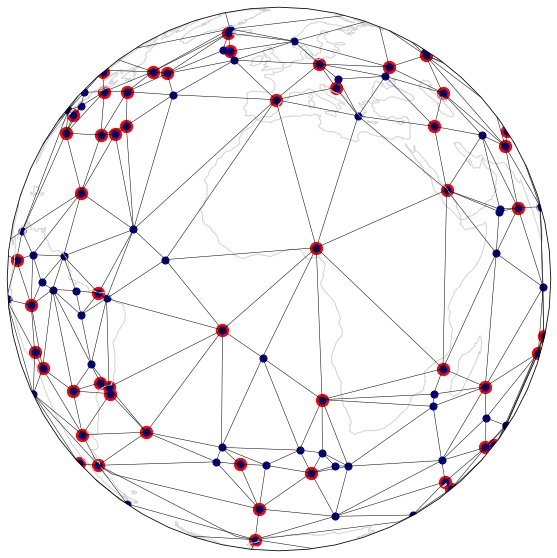

In [6]:
def mesh_fig(mesh, meshR, name):

    fig = plt.figure(figsize=(10, 10), facecolor="none")
    ax  = plt.subplot(111, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0, globe=None))
    ax.coastlines(color="lightgrey")
    ax.set_global()

    generator = mesh
    refined   = meshR

    lons0 = np.degrees(generator.lons)
    lats0 = np.degrees(generator.lats)

    lonsR = np.degrees(refined.lons)
    latsR = np.degrees(refined.lats)

    lst = refined.lst
    lptr = refined.lptr


    ax.scatter(lons0, lats0, color="Red",
                marker="o", s=150.0, transform=ccrs.PlateCarree())

    ax.scatter(lonsR, latsR, color="DarkBlue",
                marker="o", s=50.0, transform=ccrs.PlateCarree())

    
    segs = refined.identify_segments()

    for s1, s2 in segs:
        ax.plot( [lonsR[s1], lonsR[s2]],
                 [latsR[s1], latsR[s2]], 
                 linewidth=0.5, color="black", transform=ccrs.Geodetic())

    fig.savefig(name, dpi=250, transparent=True)
    
    return

mesh_fig(octo0,  octo2, "Octagon" )
mesh_fig(octoF0, octoF2, "OctagonF" )

mesh_fig(ico0, ico2, "Icosahedron" )
mesh_fig(icoF0, icoF2, "IcosahedronF" )

mesh_fig(cube0, cube2, "Cube")
mesh_fig(socc0, socc2, "SoccerBall")

mesh_fig(ring0, ring2, "Ring")
mesh_fig(rand0, rand2, "Random")


The next example is [Ex3-Interpolation](./Ex3-Interpolation.ipynb)